In [1]:
import pandas as pd
import datetime as dt
import matplotlib

In [4]:
data = pd.read_excel("example_excel_files/Dan's Application Cycle Dark.xlsx", index_col=None)
data.head()

,Schools,Secondary Invite,Secondary Submission,Rejection,Interview Invite,Interview,Waitlist,Withdraw,Acceptance
0,Harvard,2021-07-06,2021-07-11,NaT,NaT,NaT,NaT,NaT,NaT
1,University of Washington,2021-07-12,2021-07-19,NaT,2021-08-02,2022-01-06,2022-01-10,NaT,NaT
2,Duke,2021-07-15,2021-07-24,NaT,NaT,NaT,NaT,NaT,NaT
3,UC San Diego,2021-06-30,2021-07-06,NaT,NaT,NaT,NaT,NaT,NaT
4,Stanford,2021-07-02,2021-07-08,2021-10-07,NaT,NaT,NaT,NaT,NaT


In [5]:
column_names = {}
for i in range(0,len(data.columns[1:])):
    column_names[i] = data.columns[1:][i]
print(column_names)

{0: 'Secondary Invite', 1: 'Secondary Submission', 2: 'Rejection', 3: 'Interview Invite', 4: 'Interview', 5: 'Waitlist', 6: 'Withdraw', 7: 'Acceptance'}


In [6]:
# Store numbers of each action on each date
dicts = []

# Collect the dates and numbers of actions
for column in data.columns:
    if column != 'Schools':
        # Convert to date time
        data[column] = pd.to_datetime(data[column])
        
        # Gather number of actions at each date for every type of action
        temp_dict = {}
        for date in data[column]:
            # Get number of actions per date
            if not pd.isnull(date):
                temp_dict[date] = sum(data[column] <= date)
        dicts.append(temp_dict)

# Get column names based on number user supplied
column_names = {}
for i in range(0,len(data.columns[1:])):
    column_names[i] = data.columns[1:][i]

# Generate data frame
cleaned_data = pd.DataFrame(dicts).T
cleaned_data = cleaned_data.rename(column_names,axis=1)
# Add starting point
cleaned_data.loc[min(cleaned_data.index) - dt.timedelta(1)] = [0 for i in range(0, len(column_names))]
cleaned_data = cleaned_data.sort_index()
# Fill in any missing days
cleaned_data = cleaned_data.reindex(pd.date_range(start=min(cleaned_data.index), end=max(cleaned_data.index)))
# Fill in missing data
cleaned_data = cleaned_data.ffill()
cleaned_data

,Secondary Invite,Secondary Submission,Rejection,Interview Invite,Interview,Waitlist,Withdraw,Acceptance
2021-06-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-06-25,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-06-26,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-06-27,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-06-28,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2022-01-10,29.0,29.0,8.0,10.0,10.0,6.0,0.0,2.0
2022-01-11,29.0,29.0,8.0,10.0,10.0,6.0,0.0,2.0
2022-01-12,29.0,29.0,8.0,10.0,10.0,6.0,1.0,2.0
2022-01-13,29.0,29.0,8.0,10.0,10.0,6.0,1.0,2.0


<AxesSubplot:>

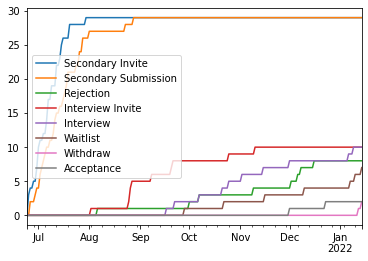

In [7]:
cleaned_data.plot.line()